In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from scipy import stats
import pandas as pd
from matplotlib.dates import DateFormatter
from pylab import rcParams
import pprint

In [81]:
counties = pd.read_csv("CAcounties.csv")
counties.head()

,County,Square miles,Population
0,Los Angeles County,4058,10039107
1,San Diego County,4207,3338330
2,Orange County,791,3175692
3,Riverside County,7206,2470546
4,San Bernardino County,20057,2180085


In [82]:
csv = "2020_US_Region_Mobility_Report.csv"
df = pd.read_csv(csv)
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [103]:
merged_df2 = df.rename(columns={"sub_region_1":"State",
                                  "sub_region_2":"County",
                                  "date":"Date",
                                  "retail_and_recreation_percent_change_from_baseline":"Retail and Recreation",
                                  "grocery_and_pharmacy_percent_change_from_baseline":"Grocery and Pharmacy",
                                  "parks_percent_change_from_baseline":"Parks",
                                  "transit_stations_percent_change_from_baseline":"Transit Stations",
                                  "workplaces_percent_change_from_baseline":"Workplaces",
                                  "residential_percent_change_from_baseline":"Residential"
})
merged_df2 = merged_df2.drop(columns=["country_region"])
#merged_df2 = merged_df2.loc[(merged_df2['Date'] < "8/16/2020")]
#merged_df2 = merged_df2.loc[(merged_df2['Date'] > "3/18/2020")]
county_df= pd.DataFrame(merged_df2)

In [123]:
parks = []
transit = []
retail = []
grocery = []
work = []
resid = []
c = []
for x in counties["County"]:
    temp = county_df.loc[(county_df['State'] == "California")]
    temp = temp.loc[(temp['County'] == str(x))]
    r_r = temp["Retail and Recreation"].tolist()
    g_p = temp["Grocery and Pharmacy"].tolist()
    prks = temp["Parks"].tolist()
    t_s = temp["Transit Stations"].tolist()
    w_p = temp["Workplaces"].tolist()
    rd = temp["Residential"].tolist()
    retail.append(np.mean(r_r[50:110]))
    grocery.append(np.mean(g_p[50:110]))
    parks.append(np.mean(prks[50:110]))
    transit.append(np.mean(t_s[50:110]))
    work.append(np.mean(w_p[50:110]))
    resid.append(np.mean(rd[50:110]))
    c.append(r_r)


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [127]:
#add these to dataframe
counties["Retail"] = retail
counties["Grocery"] = grocery
counties["Parks"] = parks
counties["Transit"] = transit
counties["Work"] = work
counties["Residential"] = resid

In [128]:
counties.head()

,County,Square miles,Population,Retail,Grocery,Parks,Transit,Work,Residential
0,Los Angeles County,4058,10039107,-48.766667,-16.800000,-30.733333,-47.883333,-44.183333,19.583333
1,San Diego County,4207,3338330,-50.100000,-15.900000,-38.266667,-56.983333,-45.766667,19.466667
2,Orange County,791,3175692,-50.233333,-12.150000,-20.866667,-48.466667,-45.283333,20.166667
3,Riverside County,7206,2470546,-44.050000,-8.283333,-42.650000,-36.433333,-39.783333,15.316667
4,San Bernardino County,20057,2180085,-40.833333,-6.200000,-21.433333,-30.783333,-36.100000,14.683333


In [130]:
counties["Density"] = counties["Population"]/counties["Square miles"]
counties.head()

,County,Square miles,Population,Retail,Grocery,Parks,Transit,Work,Residential,Density
0,Los Angeles County,4058,10039107,-48.766667,-16.800000,-30.733333,-47.883333,-44.183333,19.583333,2473.905126
1,San Diego County,4207,3338330,-50.100000,-15.900000,-38.266667,-56.983333,-45.766667,19.466667,793.517946
2,Orange County,791,3175692,-50.233333,-12.150000,-20.866667,-48.466667,-45.283333,20.166667,4014.781290
3,Riverside County,7206,2470546,-44.050000,-8.283333,-42.650000,-36.433333,-39.783333,15.316667,342.845684
4,San Bernardino County,20057,2180085,-40.833333,-6.200000,-21.433333,-30.783333,-36.100000,14.683333,108.694471


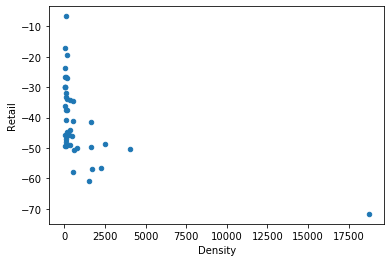

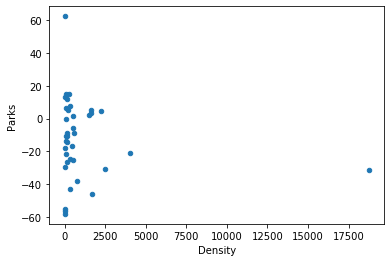

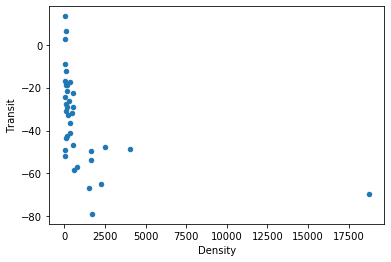

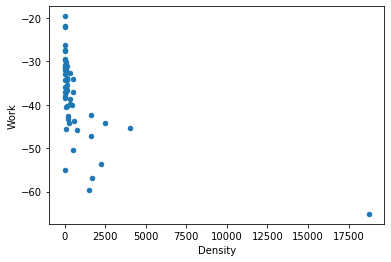

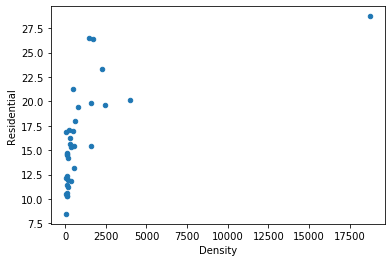

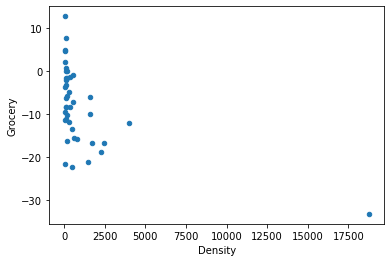

In [133]:
counties.plot.scatter(x = "Density",y = "Retail")
counties.plot.scatter(x = "Density",y = "Parks")
counties.plot.scatter(x = "Density",y = "Transit")
counties.plot.scatter(x = "Density",y = "Work")
counties.plot.scatter(x = "Density",y = "Residential")
counties.plot.scatter(x = "Density",y = "Grocery")

In [134]:
counties.corr()

,Square miles,Population,Retail,Grocery,Parks,Transit,Work,Residential,Density
Square miles,1.000000,0.190957,0.131450,0.153614,-0.130436,0.233413,0.201805,-0.280681,-0.161136
Population,0.190957,1.000000,-0.282661,-0.285645,-0.182333,-0.303389,-0.309804,0.300411,0.210805
Retail,0.131450,-0.282661,1.000000,0.865826,0.275538,0.855507,0.848360,-0.912263,-0.487860
Grocery,0.153614,-0.285645,0.865826,1.000000,0.486641,0.842001,0.835402,-0.883732,-0.534274
Parks,-0.130436,-0.182333,0.275538,0.486641,1.000000,0.401426,0.153724,-0.424788,-0.141288
Transit,0.233413,-0.303389,0.855507,0.842001,0.401426,1.000000,0.847226,-0.855409,-0.418562
Work,0.201805,-0.309804,0.848360,0.835402,0.153724,0.847226,1.000000,-0.961608,-0.540250
Residential,-0.280681,0.300411,-0.912263,-0.883732,-0.424788,-0.855409,-0.961608,1.000000,0.592519
Density,-0.161136,0.210805,-0.487860,-0.534274,-0.141288,-0.418562,-0.540250,0.592519,1.000000


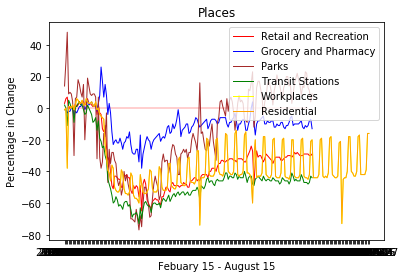